# Cleaning BIG MART Dataset
#### - MOHAN BAKSHI

In [2]:
# For basic operations
import pandas as pd
import numpy as np

# For data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importing dataset
data = pd.read_csv("datasets/bigmart.csv")

In [4]:
#Checking the dataset shape
data.shape

(8523, 12)

The shape of the <b>Big Mart</b> df is (8523, 12), which means it has 8523 rows (instances) and 12 columns (features or variables).

In [5]:
# Checking top 5 value of the data
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
# Checking missing value of the dataset
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Based on the statistic description, Item_Weight has 1463 missing values following by Outlet_Size which has 2410 missing values.

In [7]:
# Imputing mean value to the quantitative column and mode to categorical column

data["Item_Weight"] = data["Item_Weight"].fillna(data["Item_Weight"].mean())

data["Outlet_Size"] = data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0])

data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<Axes: ylabel='Item_MRP'>

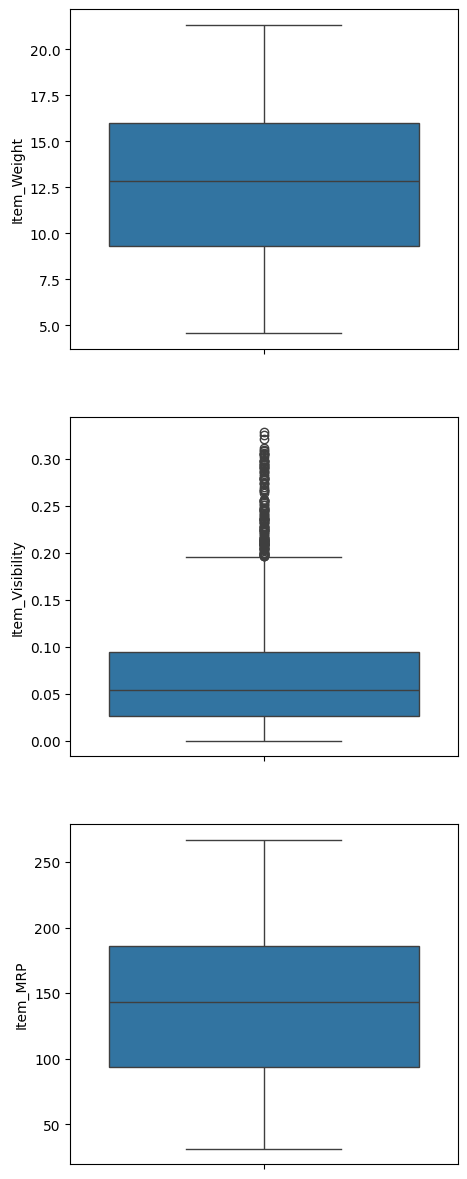

In [8]:
# Checking for outliers in the datasets
fig, axes = plt.subplots(3,1, figsize=(5,15))
sns.boxplot(data["Item_Weight"], ax=axes[0])

sns.boxplot(data["Item_Visibility"], ax=axes[1])

sns.boxplot(data["Item_MRP"], ax=axes[2])


In [9]:
data["Item_Visibility"].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

<Axes: ylabel='Item_Visibility'>

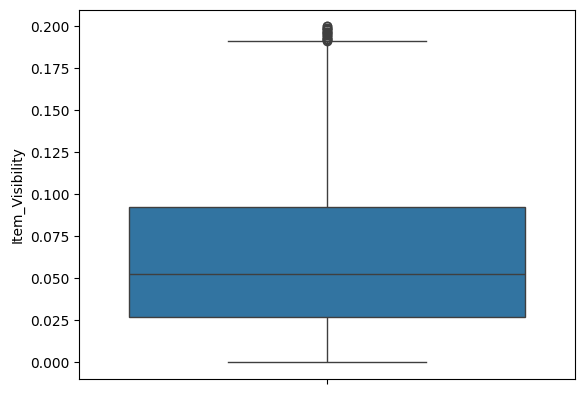

In [10]:
# Handling Item_Visibility outlier
data = data[data["Item_Visibility"] <= 0.2]
sns.boxplot(data["Item_Visibility"])

In [11]:
# Checking Item_Fat_Content value types
data["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5024
Regular    2832
LF          307
reg         117
low fat     109
Name: count, dtype: int64

As we can observe, Low Fat is defined in 3 different forms i.e Low Fat, LF, low fat. We will impute it with single name i.e Low Fat.

In [12]:
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace(("Low Fat", "LF", "low fat"), ("Low Fat"))
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace(("reg"), ("Regular"))
data["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5440
Regular    2949
Name: count, dtype: int64

<Axes: xlabel='Item_Fat_Content'>

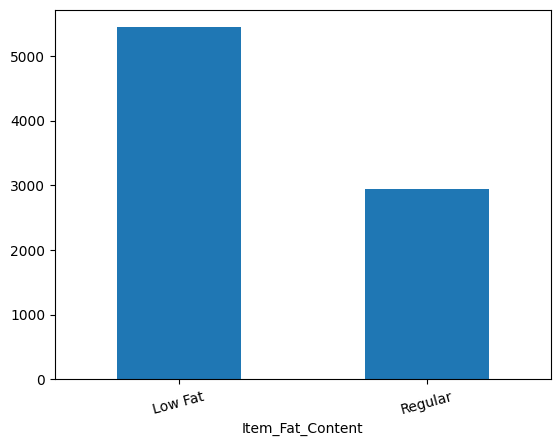

In [13]:
# plt.barplot(data["Item_Fat_Content"])
data.groupby(data["Item_Fat_Content"]).size().plot(kind = 'bar', rot = 15)

<Axes: xlabel='Outlet_Size', ylabel='Item_Fat_Content'>

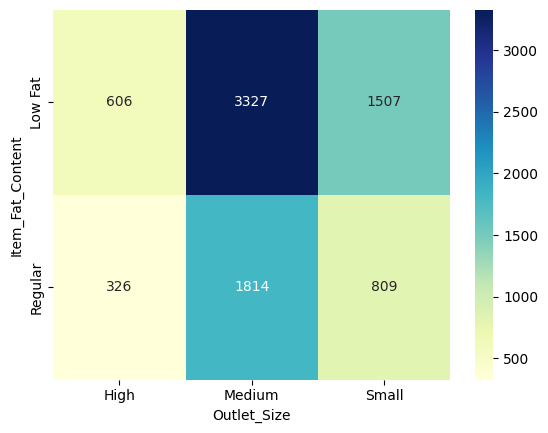

In [14]:
# Creating a contingency table
contingency_table = pd.crosstab(data['Item_Fat_Content'], data['Outlet_Size'])

# Plot heatmap
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')

The most common combination in this dataset is "Low Fat" items in "Medium" sized outlets, with 3327 items.
The least common combination is "Regular" items in "High" sized outlets, with 326 items.
Generally, "Medium" sized outlets have the highest counts for both "Low Fat" and "Regular" items.
"High" sized outlets have the lowest counts for both "Low Fat" and "Regular" items.

In [15]:
# Exporting cleaned BigMart dataset to csv

data.to_csv("Datasets/cleaned_bigmart.csv")